<a href="https://colab.research.google.com/github/RaczeQ/networkx-library-workshop/blob/master/notebooks/NetworkX_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load files

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import collections
from operator import itemgetter

import networkx as nx

## NetworkX Methods

### Loading network

Adjacency list - `nx.read_adjlist(path, comments='#')`

Edge list - `nx.read_edgelist(path, comments='#')`

### Generating network

Complete - `nx.complete_graph(nodes)`

Balanced tree - `nx.balanced_tree(branching_factor, height)`

Erdős-Rényi  - `nx.erdos_renyi_graph(nodes, probability, seed=None, directed=False)`

Barabási–Albert - `barabasi_albert_graph(nodes, edges_from_node, seed=None)`

### Measures

Betweenness - `nx.betweenness_centrality(graph)`

Closeness - `nx.closeness_centrality(graph)`

Clustering coefficient - `nx.clustering(graph)`

Degree - `nx.degree(graph)`

Density - `nx.betweenness_centrality(graph)`

Diameter - `nx.diameter(graph)` 
(Caution: unconnected graph raises exception)

Number of connected components - `nx.number_connected_components(graph)`

Pagerank - `nx.pagerank(graph)`

Shortest path length - `nx.average_shortest_path_length(graph)`

### Manipulating network

Add node - `graph.add_node(node)`

Add nodes - `graph.add_nodes_from([node1, node2, ...])` / `graph.add_nodes_from(range(1,100))`

Add edge - `graph.add_edge(node1, node2)`

Attributes:

```
>>> graph.add_node(node, attribute_name=value, time=5, weather="sunny")
>>> graph.nodes[node][attibute_name]
value
>>> del graph.nodes[node][attibute_name]
>>> graph.nodes[node]
{ "time": 5, "weather": "sunny"}
```



In [2]:
barabasi = nx.barabasi_albert_graph(100, 5)
print(nx.info(barabasi))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 475
Average degree:   9.5000


C:\Users\MSZYMANSKI\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


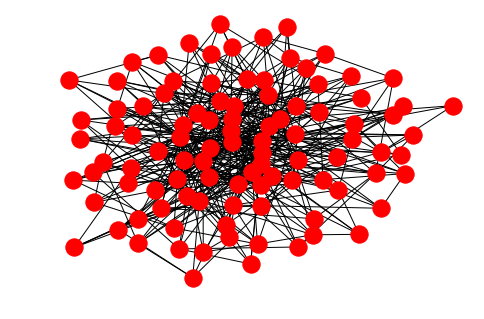

In [3]:
nx.draw(barabasi)

In [4]:
degree = nx.degree(barabasi)
print(degree)

[(0, 3), (1, 8), (2, 30), (3, 12), (4, 22), (5, 23), (6, 25), (7, 21), (8, 36), (9, 14), (10, 22), (11, 18), (12, 17), (13, 26), (14, 14), (15, 28), (16, 9), (17, 12), (18, 18), (19, 12), (20, 9), (21, 14), (22, 17), (23, 10), (24, 9), (25, 7), (26, 11), (27, 11), (28, 9), (29, 22), (30, 16), (31, 11), (32, 6), (33, 14), (34, 9), (35, 5), (36, 9), (37, 7), (38, 6), (39, 6), (40, 11), (41, 7), (42, 6), (43, 10), (44, 9), (45, 9), (46, 7), (47, 7), (48, 5), (49, 6), (50, 6), (51, 6), (52, 8), (53, 6), (54, 8), (55, 6), (56, 5), (57, 9), (58, 8), (59, 7), (60, 5), (61, 5), (62, 7), (63, 5), (64, 6), (65, 7), (66, 6), (67, 6), (68, 5), (69, 7), (70, 5), (71, 6), (72, 6), (73, 7), (74, 6), (75, 5), (76, 5), (77, 6), (78, 6), (79, 7), (80, 5), (81, 8), (82, 7), (83, 5), (84, 5), (85, 6), (86, 5), (87, 5), (88, 5), (89, 5), (90, 5), (91, 6), (92, 6), (93, 5), (94, 5), (95, 5), (96, 5), (97, 5), (98, 5), (99, 5)]


In [5]:
average_degree = np.mean([d for n,d in degree])
print(average_degree)

9.5


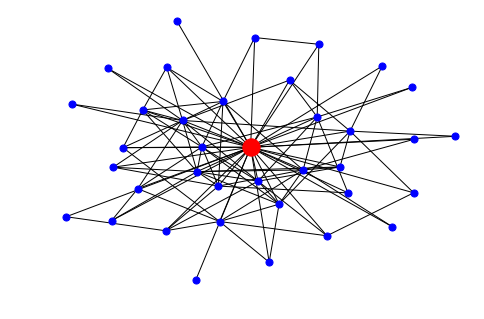

In [6]:
(largest_hub, d) = sorted(degree, key=itemgetter(1))[-1]
# Create ego graph of main hub
hub_ego = nx.ego_graph(barabasi, largest_hub)
# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

<BarContainer object of 21 artists>

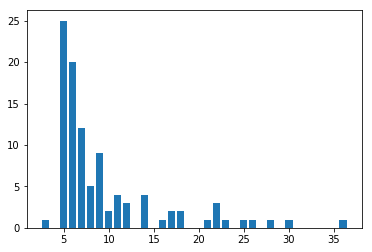

In [7]:
degree_sequence = sorted([d for n, d in degree], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt)

In [8]:
jazz_graph = nx.read_adjlist('../networks/jazz', comments='%')

In [9]:
print(nx.info(jazz_graph))

Name: 
Type: Graph
Number of nodes: 198
Number of edges: 2742
Average degree:  27.6970


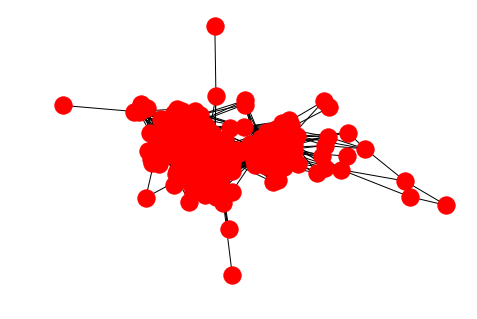

In [10]:
nx.draw(jazz_graph)

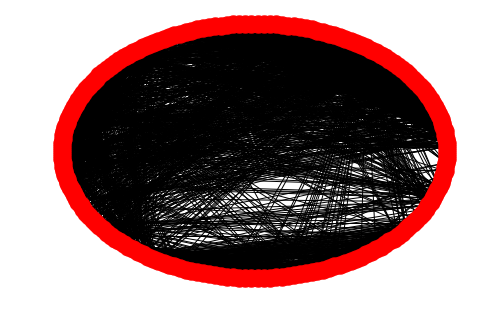

In [11]:
nx.draw_circular(jazz_graph)

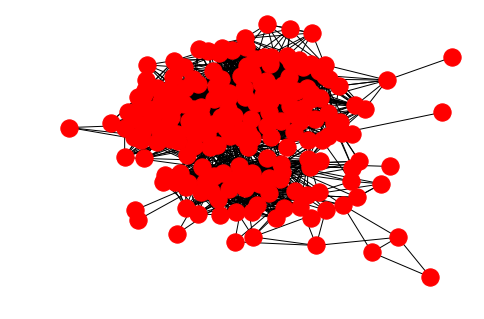

In [12]:
nx.draw_kamada_kawai(jazz_graph)

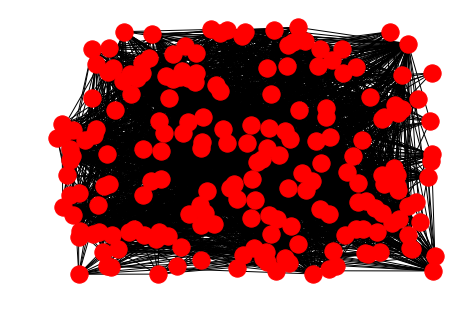

In [13]:
nx.draw_random(jazz_graph)

In [14]:
degree = nx.degree(jazz_graph)
print(degree)

[('1', 23), ('10', 42), ('11', 40), ('12', 46), ('13', 60), ('14', 49), ('15', 49), ('16', 23), ('17', 20), ('18', 60), ('19', 56), ('2', 21), ('20', 75), ('21', 43), ('22', 10), ('23', 74), ('24', 45), ('3', 29), ('4', 43), ('5', 12), ('6', 23), ('7', 96), ('8', 20), ('9', 26), ('120', 17), ('121', 43), ('122', 41), ('123', 39), ('124', 31), ('125', 52), ('67', 100), ('130', 19), ('145', 8), ('146', 9), ('147', 8), ('148', 24), ('149', 48), ('150', 38), ('157', 11), ('159', 29), ('160', 25), ('101', 55), ('112', 48), ('128', 41), ('133', 51), ('137', 46), ('152', 30), ('164', 39), ('165', 40), ('166', 34), ('167', 34), ('168', 37), ('169', 32), ('170', 31), ('171', 32), ('172', 33), ('173', 34), ('174', 33), ('177', 14), ('178', 14), ('179', 18), ('153', 27), ('155', 39), ('100', 44), ('102', 31), ('103', 29), ('104', 23), ('105', 35), ('106', 23), ('107', 27), ('108', 23), ('109', 59), ('110', 31), ('111', 53), ('116', 27), ('117', 55), ('118', 28), ('119', 46), ('127', 13), ('138', 

In [15]:
average_degree = np.mean([d for n,d in degree])
print(average_degree)

27.696969696969695


<BarContainer object of 62 artists>

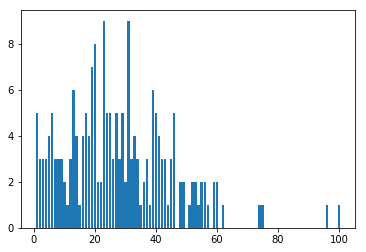

In [16]:
degree_sequence = sorted([d for n, d in degree], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt)

In [17]:
betweenness = nx.betweenness_centrality(jazz_graph)
print(betweenness)

{'1': 0.000851342222753862, '10': 0.013289336862047309, '11': 0.004313951504203767, '12': 0.0034177056601804854, '13': 0.01407907557385525, '14': 0.004380981675579163, '15': 0.004792559595517549, '16': 0.002018648490290283, '17': 0.0018039443649464706, '18': 0.009455168971331605, '19': 0.008640471063891916, '2': 0.0005763956613445939, '20': 0.017638257970617546, '21': 0.002207951859421836, '22': 0.000687091522571601, '23': 0.03960002124911093, '24': 0.00624230305403988, '3': 0.006628843999510171, '4': 0.002207951859421836, '5': 0.0008563381619116215, '6': 0.0008049075549189744, '7': 0.057538917986120146, '8': 0.001435756058631026, '9': 0.004031837519016956, '120': 0.0005919700809628333, '121': 0.0057962894806967424, '122': 0.009338368742625251, '123': 0.00712743976648565, '124': 0.0029765031418601184, '125': 0.01766588737089527, '67': 0.15105615373941586, '130': 0.005193766161005843, '145': 1.2725757960400039e-05, '146': 5.5010340672829014e-05, '147': 1.2725757960400039e-05, '148': 0.0

In [18]:
average_betweenness = np.mean([b for d,b in betweenness.items()])
print(average_betweenness)

0.006301228382446656


In [19]:
pagerank = nx.pagerank(jazz_graph)
print(pagerank)
print('Max pagerank:', sorted([p for n, p in pagerank.items()], reverse=True)[0])

{'1': 0.004054274378673574, '10': 0.006862707924183666, '11': 0.006348121073056098, '12': 0.007042873280094578, '13': 0.009252881141315877, '14': 0.007526997296145854, '15': 0.007525209268080119, '16': 0.004096604727493827, '17': 0.003948478855530476, '18': 0.009060762038158074, '19': 0.008477095263097457, '2': 0.003629854939089149, '20': 0.011216290798180817, '21': 0.006771035514800392, '22': 0.0023280777780608723, '23': 0.011461609126898618, '24': 0.007112614875989314, '3': 0.005209316576796491, '4': 0.006771035514800392, '5': 0.0025503283665934537, '6': 0.00402055427111106, '7': 0.0145479567746197, '8': 0.0036687876924427435, '9': 0.004665455240792083, '120': 0.0031520212674609684, '121': 0.006692238260507386, '122': 0.006913305548546279, '123': 0.006565244504702942, '124': 0.005251047446745982, '125': 0.008412364075460537, '67': 0.016575536080634494, '130': 0.0039476268042185425, '145': 0.0020950809239109044, '146': 0.0022570247261652424, '147': 0.0020950809239109044, '148': 0.0046

## Visualization

In [20]:
karate_club = nx.karate_club_graph()
print(nx.info(karate_club))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


### Matplotlib

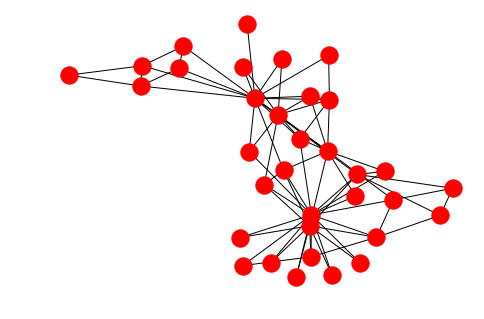

In [21]:
nx.draw(karate_club)

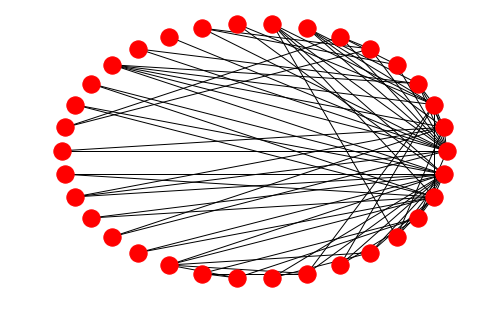

In [22]:
nx.draw(karate_club, pos=nx.circular_layout(karate_club))

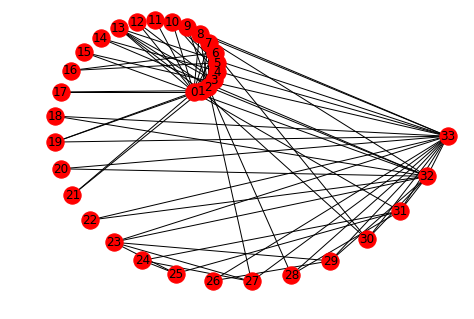

In [81]:
pos = nx.circular_layout(karate_club, karate_club.nodes())
nx.draw(karate_club, pos, with_labels=True)

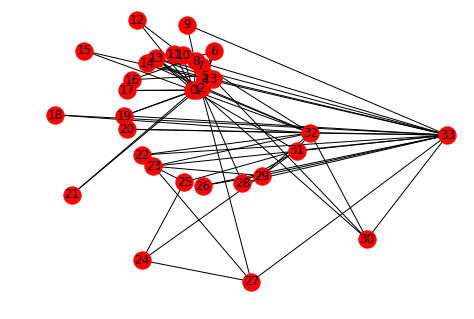

In [83]:
pos = nx.circular_layout(karate_club, list(map(lambda node: 2*node if node % 3 == 0 else node,[node for node in karate_club.nodes()])))
nx.draw(karate_club, pos, with_labels=True)

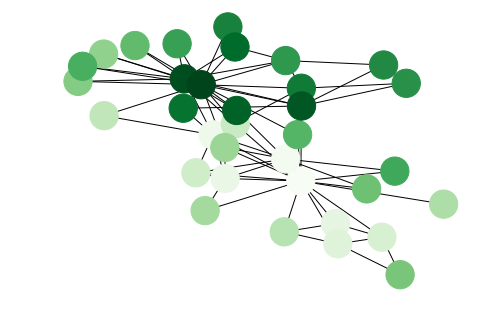

In [25]:
pos = nx.spring_layout(karate_club, iterations=200)
nx.draw(karate_club, node_color=range(34), node_size=800, cmap=plt.cm.Greens)

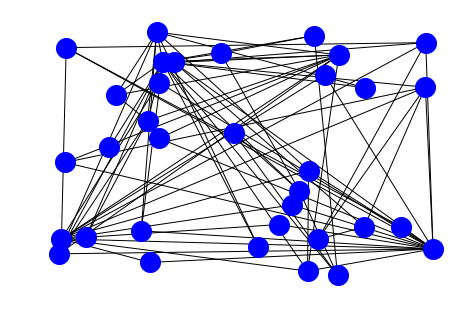

In [26]:
nx.draw_random(karate_club, node_color="blue", node_size=400, cmap=plt.cm.Greens)

### D3.js

In [27]:
from IPython.core.display import display, HTML, Javascript
from string import Template
import json

json_network = nx.node_link_data(karate_club)
print(json_network)

{'directed': False, 'multigraph': False, 'graph': {'name': "Zachary's Karate Club"}, 'nodes': [{'club': 'Mr. Hi', 'id': 0}, {'club': 'Mr. Hi', 'id': 1}, {'club': 'Mr. Hi', 'id': 2}, {'club': 'Mr. Hi', 'id': 3}, {'club': 'Mr. Hi', 'id': 4}, {'club': 'Mr. Hi', 'id': 5}, {'club': 'Mr. Hi', 'id': 6}, {'club': 'Mr. Hi', 'id': 7}, {'club': 'Mr. Hi', 'id': 8}, {'club': 'Officer', 'id': 9}, {'club': 'Mr. Hi', 'id': 10}, {'club': 'Mr. Hi', 'id': 11}, {'club': 'Mr. Hi', 'id': 12}, {'club': 'Mr. Hi', 'id': 13}, {'club': 'Officer', 'id': 14}, {'club': 'Officer', 'id': 15}, {'club': 'Mr. Hi', 'id': 16}, {'club': 'Mr. Hi', 'id': 17}, {'club': 'Officer', 'id': 18}, {'club': 'Mr. Hi', 'id': 19}, {'club': 'Officer', 'id': 20}, {'club': 'Mr. Hi', 'id': 21}, {'club': 'Officer', 'id': 22}, {'club': 'Officer', 'id': 23}, {'club': 'Officer', 'id': 24}, {'club': 'Officer', 'id': 25}, {'club': 'Officer', 'id': 26}, {'club': 'Officer', 'id': 27}, {'club': 'Officer', 'id': 28}, {'club': 'Officer', 'id': 29}, {'

In [28]:
css_text = '''
.links line {
    stroke: #343434;
    stroke-opacity: 0.6;
}

.nodes circle {
    stroke: #ff7058;
    stroke-width: 2px;
    fill: rgb(132, 219, 255);
}

'''

In [29]:
js_text_template = Template('''

var data = '$python_data' ;
var id = '$id';

console.log(data);

chart = {
  const links = data.links.map(d => Object.create(d));
  const nodes = data.nodes.map(d => Object.create(d));

  const simulation = d3.forceSimulation(nodes)
      .force("link", d3.forceLink(links).id(d => d.id))
      .force("charge", d3.forceManyBody())
      .force("x", d3.forceX())
      .force("y", d3.forceY());

  const svg = d3.select(DOM.svg(width, height))
      .attr("viewBox", [-width / 2, -height / 2, width, height]);

  const link = svg.append("g")
      .attr("stroke", "#999")
      .attr("stroke-opacity", 0.6)
    .selectAll("line")
    .data(links)
    .join("line")
      .attr("stroke-width", d => Math.sqrt(d.value));

  const node = svg.append("g")
      .attr("stroke", "#fff")
      .attr("stroke-width", 1.5)
    .selectAll("circle")
    .data(nodes)
    .join("circle")
      .attr("r", 5)
      .attr("fill", color)
      .call(drag(simulation));

  node.append("title")
      .text(d => d.id);

  simulation.on("tick", () => {
    link
        .attr("x1", d => d.source.x)
        .attr("y1", d => d.source.y)
        .attr("x2", d => d.target.x)
        .attr("y2", d => d.target.y);

    node
        .attr("cx", d => d.x)
        .attr("cy", d => d.y);
  });

  invalidation.then(() => simulation.stop());

  return svg.node();
}

''')

In [30]:
js_template2 = Template('''
var drawKarateClub = function () {
    var data = '$python_data' ;
    var id = '$id';
    var svg = d3.select("svg"),
        width = +svg.attr("width"),
        height = +svg.attr("height");

    var color = d3.scaleOrdinal(d3.schemeCategory10);

    var simulation = d3.forceSimulation()
        .force("link", d3.forceLink().id(function (d) {
            return d.id;
        }))
        .force("charge", d3.forceManyBody())
        .force("center", d3.forceCenter(width / 2, height / 2));

    var graph = JSON.parse(data);

    var link = svg.append("g")
        .attr("class", "links")
        .selectAll("line")
        .data(graph.links)
        .enter().append("line")
        .attr("stroke-width", function (d) {
            return Math.sqrt(d.value);
        });

    var node = svg.append("g")
        .attr("class", "nodes")
        .selectAll("circle")
        .data(graph.nodes)
        .enter().append("circle")
        .attr("r", 7)
        .call(d3.drag()
            .on("start", dragstarted)
            .on("drag", dragged)
            .on("end", dragended));
    node.append("title")
        .text(function (d) {
            return d.id;
        });

    node.attr('id', function (d) {
        return 'id' + d.id;
    });

    simulation
        .nodes(graph.nodes)
        .on("tick", ticked);

    simulation.force("link")
        .links(graph.links);

    function ticked() {
        link
        .attr("x1", function (d) {
                return d.source.x;
            })
            .attr("y1", function (d) {
                return d.source.y;
            })
            .attr("x2", function (d) {
                return d.target.x;
            })
            .attr("y2", function (d) {
                return d.target.y;
            });

        node
            .attr("cx", function (d) {
                return d.x;
            })
            .attr("cy", function (d) {
                return d.y;
            });
    }

    function dragstarted(d) {
        if (!d3.event.active) simulation.alphaTarget(0.3).restart();
        d.fx = d.x;
        d.fy = d.y;
    }

    function dragged(d) {
        d.fx = d3.event.x;
        d.fy = d3.event.y;
    }

    function dragended(d) {
        if (!d3.event.active) simulation.alphaTarget(0);
        d.fx = null;
        d.fy = null;
    }
};
drawKarateClub();
''')

In [94]:
html_template = Template('''
<style> $css_text </style>
<div id="graph-div">
    <h5>$title</h5>
    <svg width="800" height="300"></svg>                
</div>
<script>
    $js_text
</script>
''')

In [32]:
%load_ext py_d3

In [95]:


#with open('d3.min.js', 'r') as myfile:
#  js_data = myfile.read()

#d3 = 'console.log("ASDA");' + js_data

json_graph = json.dumps(json_network)
json_graph = json_graph.replace("'", r"\'")
js_text = js_template2.substitute({'python_data': json_graph, 'id': 'graph-div' })
html = HTML(html_template.substitute({'title':'Zachary\'s Karate Club','css_text': css_text, 'js_text': js_text}))
display(html)

## Generatory grafów

### Klasyczne (proste) generatory

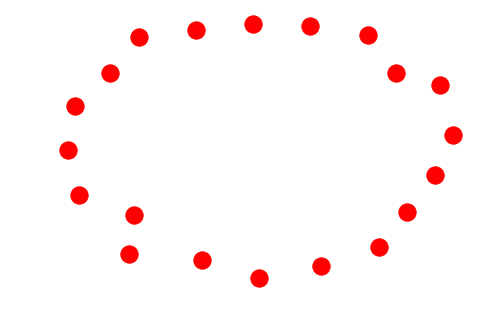

In [36]:
empty_graph = nx.empty_graph(20, create_using=nx.Graph)
nx.draw(empty_graph)

In [43]:
null_graph = nx.null_graph(create_using=nx.DiGraph)
print(nx.info(null_graph))

Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0



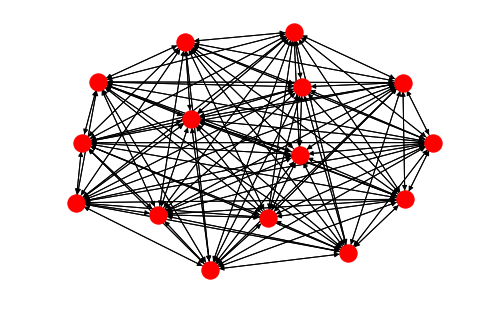

In [46]:
complete_graph = nx.complete_graph(15, create_using=nx.DiGraph)
nx.draw(complete_graph)

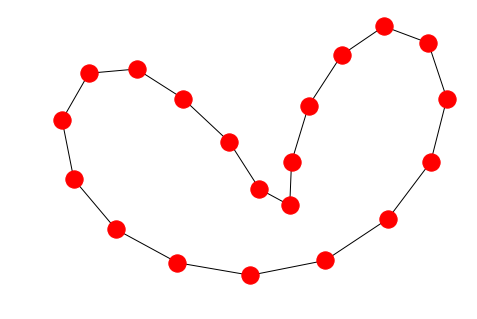

In [56]:
cycle_graph= nx.cycle_graph(20)
nx.draw(cycle_graph)

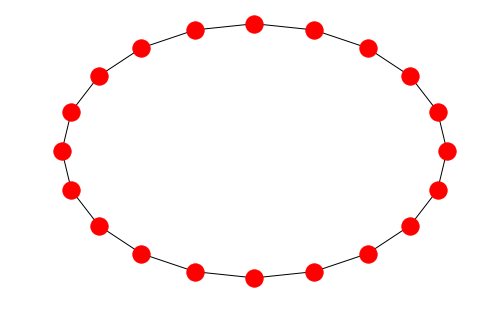

In [55]:
pos = nx.circular_layout(cycle_graph)
nx.draw(cycle_graph, pos)

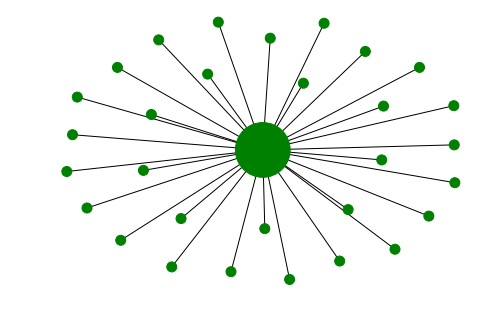

In [79]:
star_graph = nx.star_graph(30)
degrees = nx.degree(star_graph)
nx.draw(star_graph, node_color='green', node_size=[degree*100 for (node, degree) in degrees])

In [96]:
star_link_data = nx.node_link_data(star_graph)
json_graph = json.dumps(star_link_data)
json_graph = json_graph.replace("'", r"\'")
js_text = js_template2.substitute({'python_data': json_graph, 'id': 'graph-div' })
html = HTML(html_template.substitute({'title': 'Star graph', 'css_text': css_text, 'js_text': js_text}))
display(html)

In [ ]:
### 